In [1]:
import numpy as np
import scipy.optimize as opt
import scipy.stats as stat
import matplotlib.pyplot as plt

In [2]:
# defining the poisson clipping function
def clip_poisson(t, c_0):
    return c_0 - np.log(1 + np.exp(-t + c_0))

In [3]:
# example value of clipping function for argument 2 at c_0 = 5
clip_poisson(2, 5)

1.951412648426258

In [4]:
x_seq_temp = list(range(-500, 2500, 1))
x_seq = [i/100 for i in x_seq_temp]

In [5]:
y_seq_5 = [clip_poisson(t, 5) for t in x_seq]
y_seq_10 = [clip_poisson(t, 10) for t in x_seq]

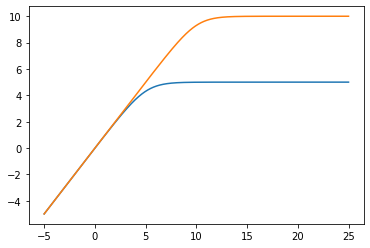

In [6]:
# clipping function for Poisson for c_0 = 5, 10
plt.plot(x_seq, y_seq_5);
plt.plot(x_seq, y_seq_10);

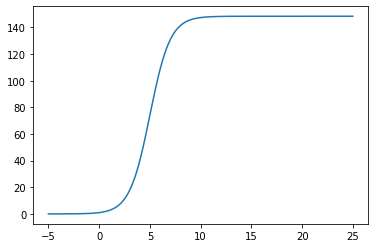

In [7]:
# how A(eta(t)) looks like for Poisson
y_exp_5 = np.exp([clip_poisson(x, 5) for x in x_seq])
plt.plot(x_seq, y_exp_5);

In [8]:
# negative log-likelihood un-normalized
def pois_lik(beta, X, Y, c_0):
    X_beta = [np.dot(x, beta) for x in X]
    clipped_X_beta = [clip_poisson(t = a, c_0 = c_0) for a in X_beta]
    lik_clipped = sum(Y*clipped_X_beta - np.exp(clipped_X_beta))
    return -lik_clipped

In [9]:
# generating X, Y
n = 50
p = 10
beta_0 = np.ones(p)
# beta_0 = np.zeros(p)
X = np.random.normal(loc = 0, scale = 1, size = (n, p))
Y = np.array([np.random.poisson(lam = np.exp(np.dot(x, beta_0))) for x in X])
c_0 = 10

In [10]:
# running and storing the optimization routine
opt_store = opt.minimize(pois_lik, np.zeros(p), args = (X, Y, c_0), method = 'Powell')

In [11]:
# compare with beta_0 = all ones (c_0 = 10)
opt_store.x

array([0.97380356, 0.95406315, 0.86058158, 0.99104861, 0.95808072,
       1.12035503, 1.09058358, 0.99403746, 0.93265906, 0.97873239])

In [12]:
# generating X, Y
n = 50
p = 10
beta_0 = np.ones(p)
# beta_0 = np.zeros(p)
X = np.random.normal(loc = 0, scale = 1, size = (n, p))
Y = np.array([np.random.poisson(lam = np.exp(np.dot(x, beta_0))) for x in X])
c_0 = 3

In [13]:
# running and storing the optimization routine
opt_store = opt.minimize(pois_lik, np.zeros(p), args = (X, Y, c_0), method = 'Powell')

In [14]:
# compare with beta_0 = all ones (c_0 = 3)
opt_store.x

array([2.09280212, 1.74932176, 1.99744938, 1.57483124, 2.32169182,
       1.17379807, 2.05448786, 1.52796457, 1.62418799, 0.95844447])

In [15]:
# generating X, Y
n = 50
p = 10
beta_0 = np.ones(p)
# beta_0 = np.zeros(p)
X = np.random.normal(loc = 0, scale = 1, size = (n, p))
Y = np.array([np.random.poisson(lam = np.exp(np.dot(x, beta_0))) for x in X])
c_0 = .5

In [16]:
# running and storing the optimization routine
opt_store = opt.minimize(pois_lik, np.zeros(p), args = (X, Y, c_0), method = 'Powell')

In [17]:
# compare with beta_0 = all ones (c_0 = .5)
opt_store.x

array([ 2.03055361,  4.80860232,  3.20021291,  4.67138179,  3.57508122,
        2.95776079,  3.92214196,  2.42649281,  1.29203928, -0.83695807])

In [18]:
# mse function for a fixed c_0 and fixed beta_0
def mse(n, p, c_0, beta_0, n_iter):
    beta_sum = 0
    for i in range(n_iter):
        X = np.random.normal(loc = 0, scale = 1, size = (n, p))
        Y = np.array([np.random.poisson(lam = np.exp(np.dot(x, beta_0))) for x in X])
        opt_store = opt.minimize(pois_lik, np.zeros(p), args = (X, Y, c_0), method = 'Powell')
        val = np.dot(opt_store.x - beta_0, opt_store.x - beta_0)/p
        beta_sum = ((beta_sum*i) + val)/(i + 1)
    return beta_sum

In [19]:
mse(n = 100, p = 10, c_0 = 10, beta_0 = np.zeros(10), n_iter = 100)

0.009725642865507405

In [20]:
mse(n = 100, p = 10, c_0 = 3, beta_0 = np.zeros(10), n_iter = 100)

0.013472555674689942

In [21]:
mse(n = 100, p = 10, c_0 = .5, beta_0 = np.zeros(10), n_iter = 100)

0.05956296099219581

In [22]:
# We see that average MSE tends to increase with lower c_0, as expected, true beta_0 is all zeros

In [23]:
mse(n = 100, p = 10, c_0 = 10, beta_0 = np.ones(10), n_iter = 100)

0.023239361321027985

In [24]:
mse(n = 100, p = 10, c_0 = 3, beta_0 = np.ones(10), n_iter = 100)

4.276050883648557

In [25]:
mse(n = 100, p = 10, c_0 = .5, beta_0 = np.ones(10), n_iter = 100)

5.79373723480374

In [26]:
# We see that average MSE tends to increase with lower c_0, as expected, true beta_0 is all ones

In [27]:
# taking small interval for univariate beta, larger values run into poisson generation error in python
beta_seq = np.array(range(-10, 11, 1))/5
mse_array_10 = [mse(n = 50, p = 1, c_0 = 10, beta_0 = np.array([i]), n_iter = 100) for i in beta_seq]

In [28]:
mse_array_10

[0.0035808688292393027,
 0.0023212953646777634,
 0.004556442113806595,
 0.006904339312583718,
 0.007944820441196394,
 0.007154611358873266,
 0.011017866369315168,
 0.013283162055950183,
 0.023415672393213616,
 0.01947166494192612,
 0.01949889011553914,
 0.017740895928823528,
 0.017430123491389112,
 0.014923467094096197,
 0.011878462679701845,
 0.008187986139635969,
 0.006779810174108403,
 0.006657605622425551,
 0.003334578323674115,
 0.0028015982182420613,
 0.0018849214638640727]

In [29]:
beta_seq = np.array(range(-10, 11, 1))/5
mse_array_3 = [mse(n = 50, p = 1, c_0 = 3, beta_0 = np.array([i]), n_iter = 100) for i in beta_seq]

In [30]:
mse_array_3

[0.8774163203507045,
 0.5316362256616336,
 0.3706268006698248,
 0.2055682694834815,
 0.09771240731699535,
 0.05852093789420623,
 0.031358699303665444,
 0.02907800502301707,
 0.02506630975116289,
 0.02550180198145403,
 0.025382744238280755,
 0.02075626288921772,
 0.01939729557555227,
 0.02286004280305371,
 0.028590143756198234,
 0.05961385637067119,
 0.11693666832998648,
 0.2020229408206222,
 0.3463470875993799,
 0.5923555938476137,
 0.9126431956020852]

In [37]:
beta_seq = np.array(range(-10, 11, 1))/5
mse_array_half = [mse(n = 50, p = 1, c_0 = .5, beta_0 = np.array([i]), n_iter = 100) for i in beta_seq]

In [38]:
mse_array_half

[7.859048307307587,
 6.906788707905795,
 4.664176350625516,
 3.7752030945152124,
 3.049031180105107,
 1.837235341739745,
 1.0758265864313004,
 0.627250444560982,
 0.2982837273587871,
 0.18076681792089783,
 0.10054903423625582,
 0.1673316299159894,
 0.32051210397730023,
 0.6464248680394222,
 1.1944932990375339,
 1.5179691999130092,
 2.3526528235161215,
 3.6522434220599074,
 4.781452475506063,
 5.094966431116124,
 7.293333528705153]

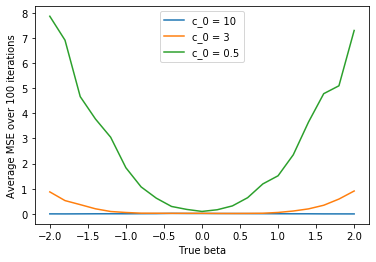

In [39]:
# MSE plot for uni-variate beta
plt.plot(beta_seq, mse_array_10, label='c_0 = 10');
plt.plot(beta_seq, mse_array_3, label='c_0 = 3');
plt.plot(beta_seq, mse_array_half, label='c_0 = 0.5');
plt.xlabel('True beta')
plt.ylabel('Average MSE over 100 iterations')
plt.legend();